In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load the dataset
data = pd.read_csv('feature_seln_new.csv', parse_dates=['START_TIME'], index_col='START_TIME')
df=data[data.columns[1:]]

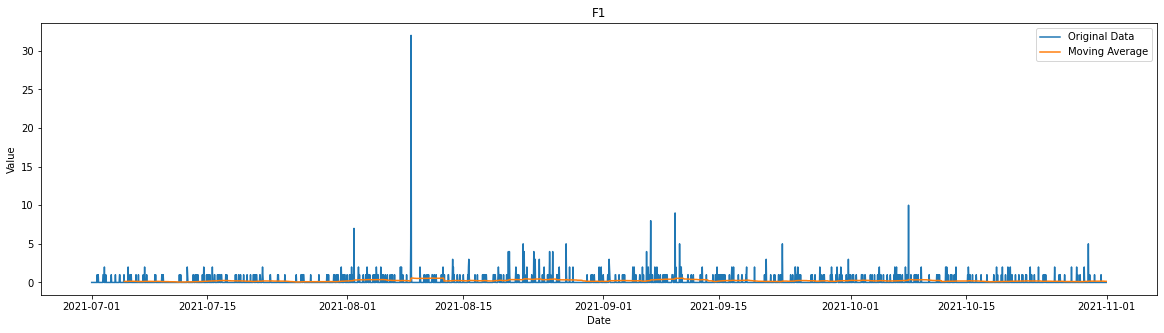

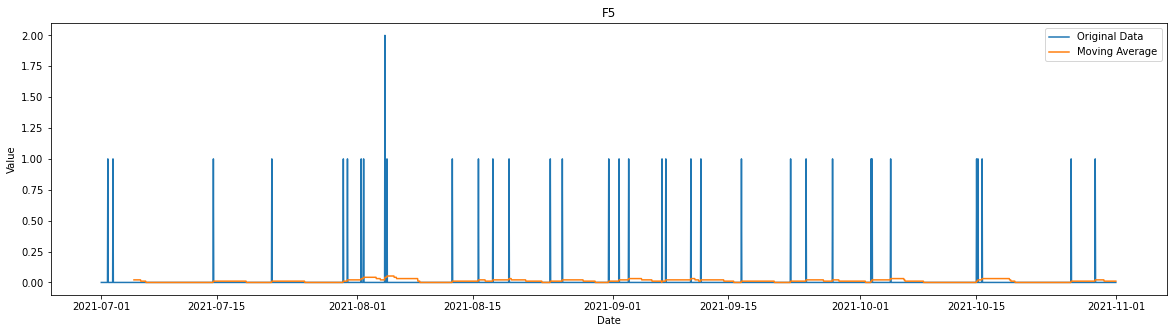

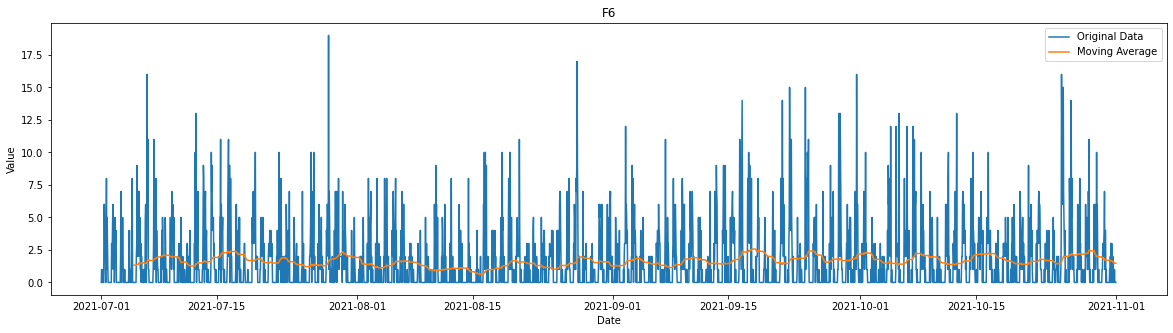

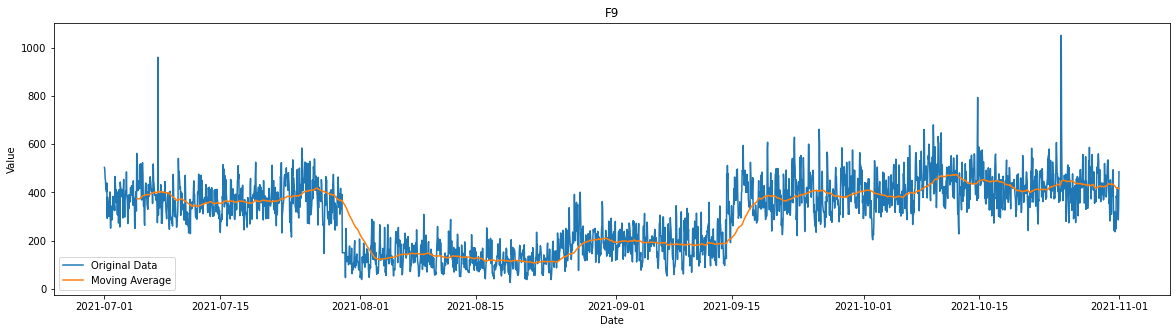

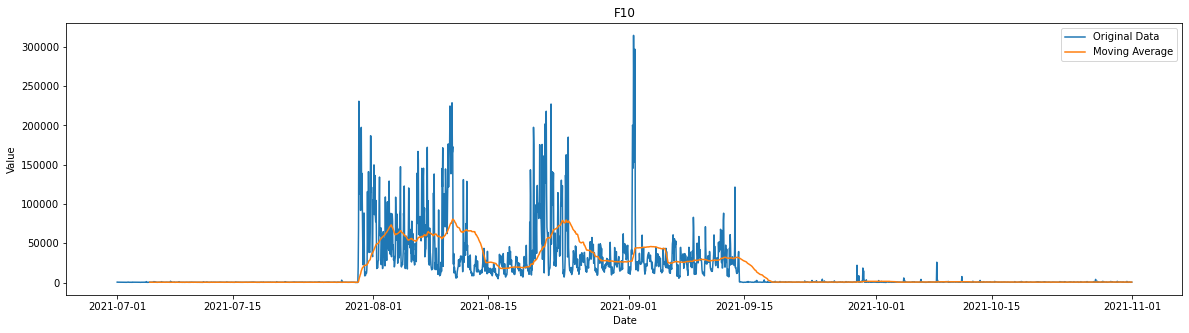

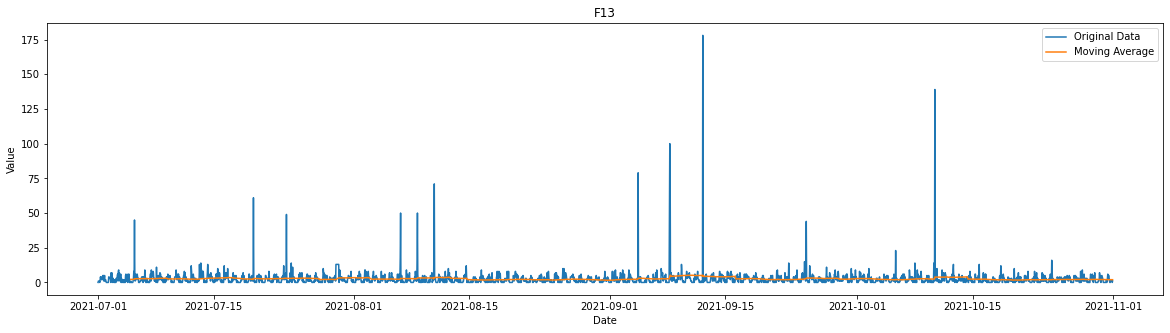

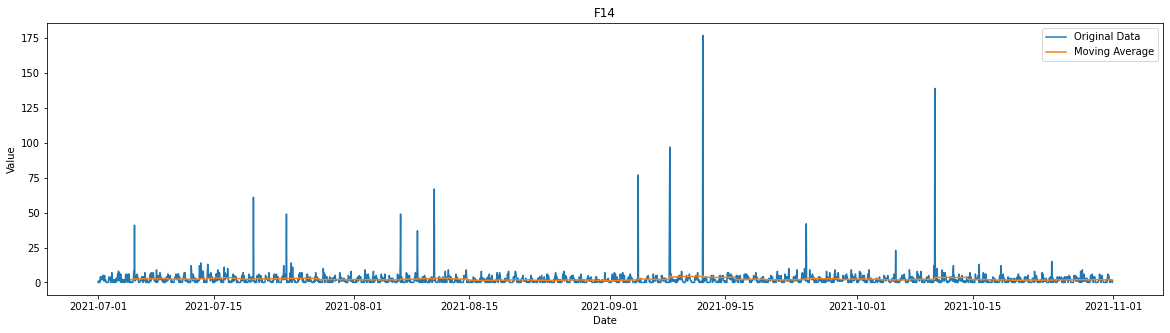

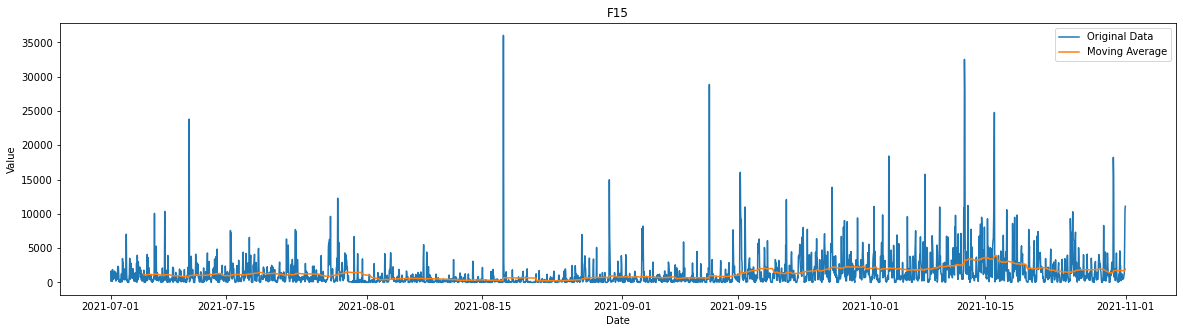

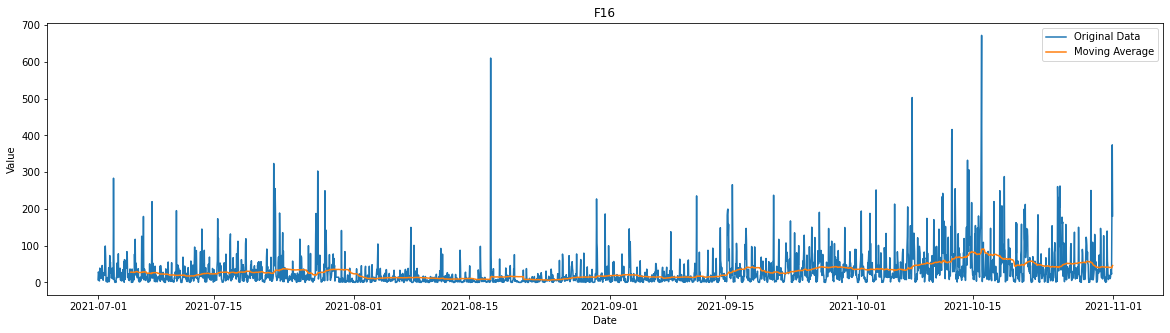

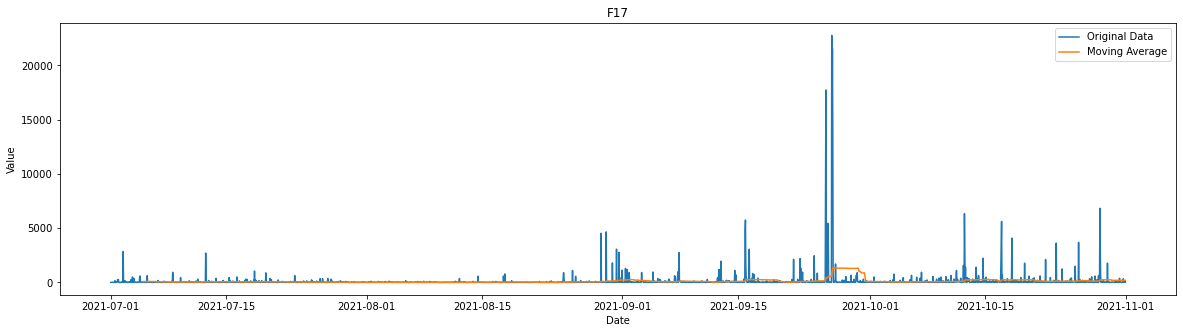

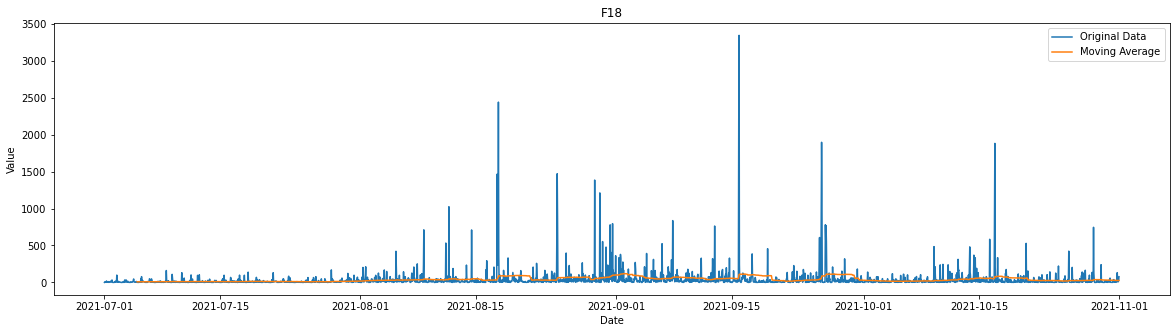

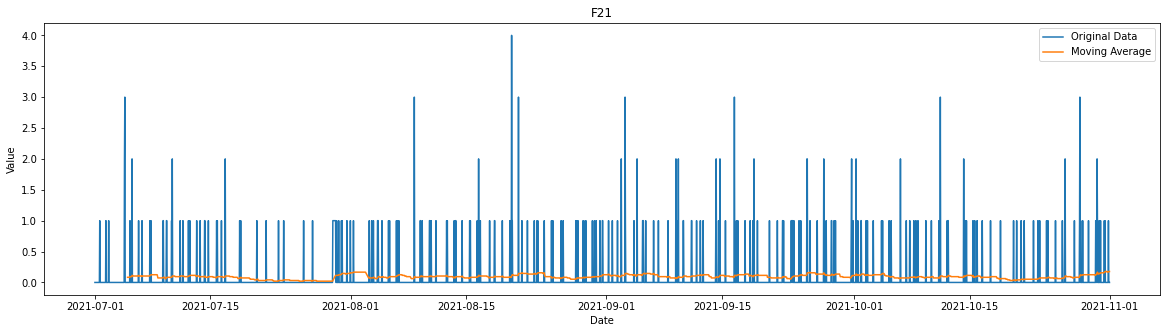

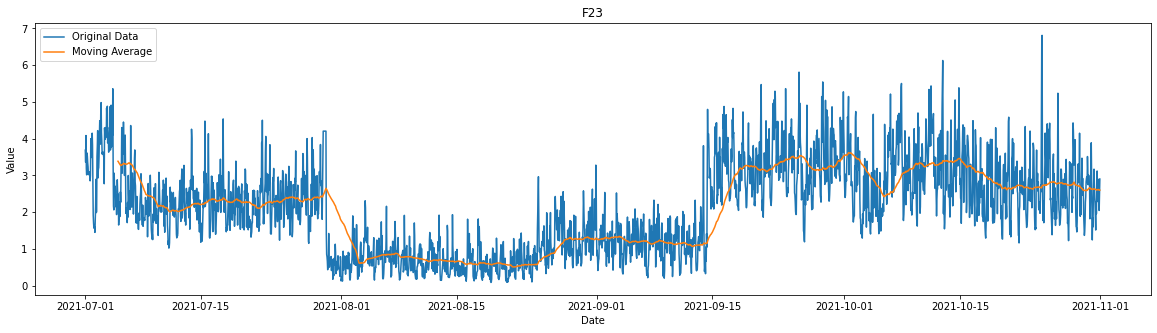

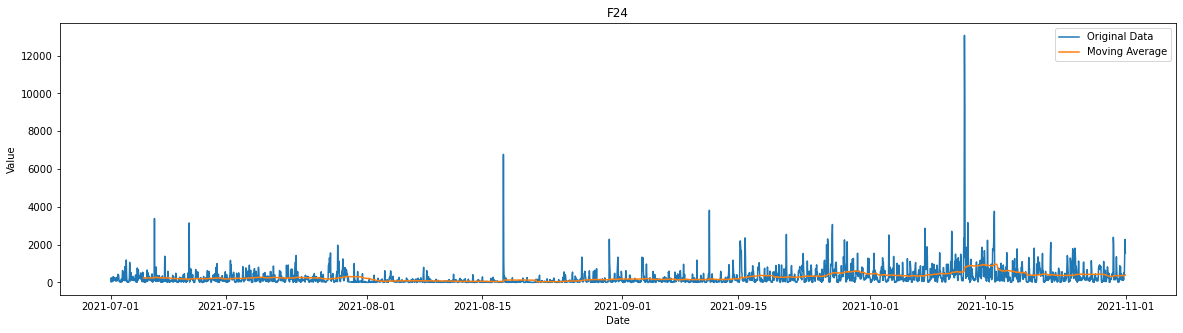

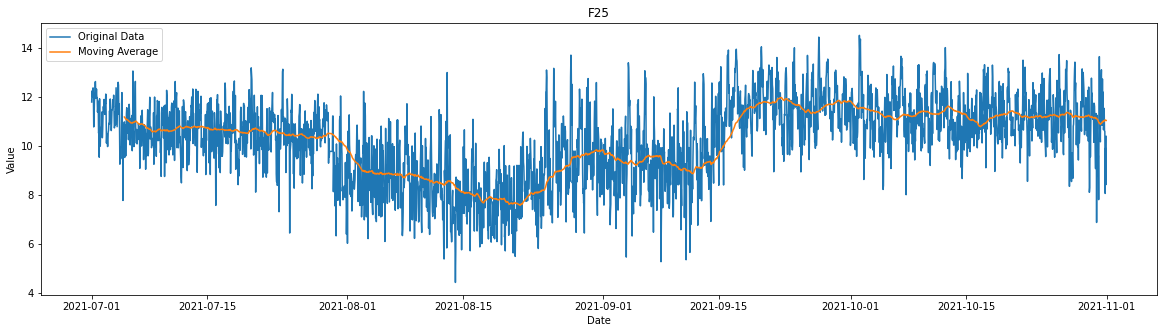

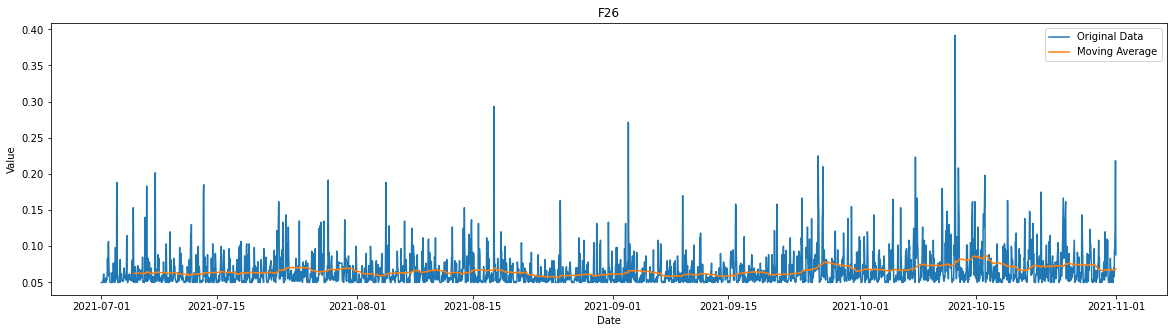

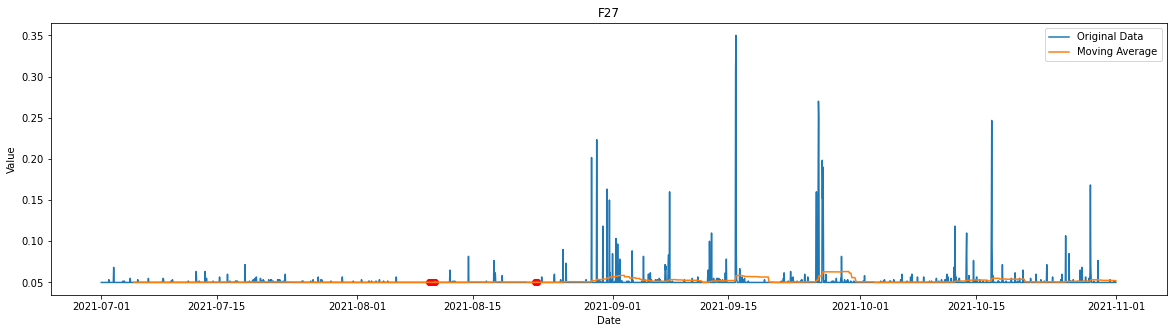

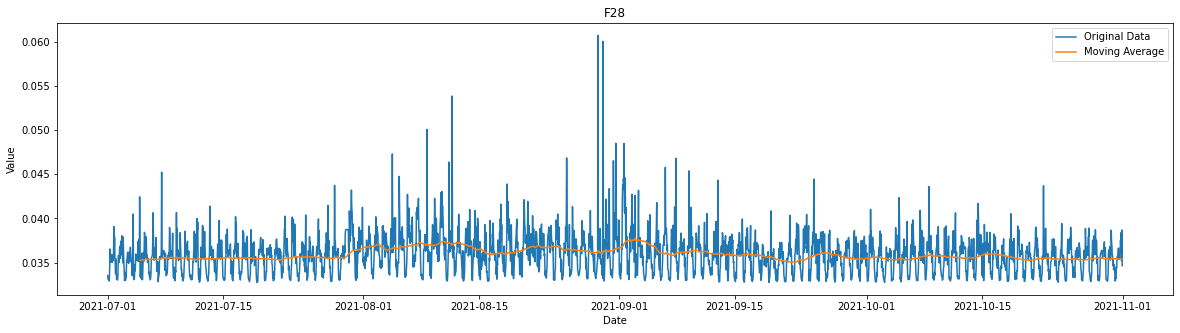

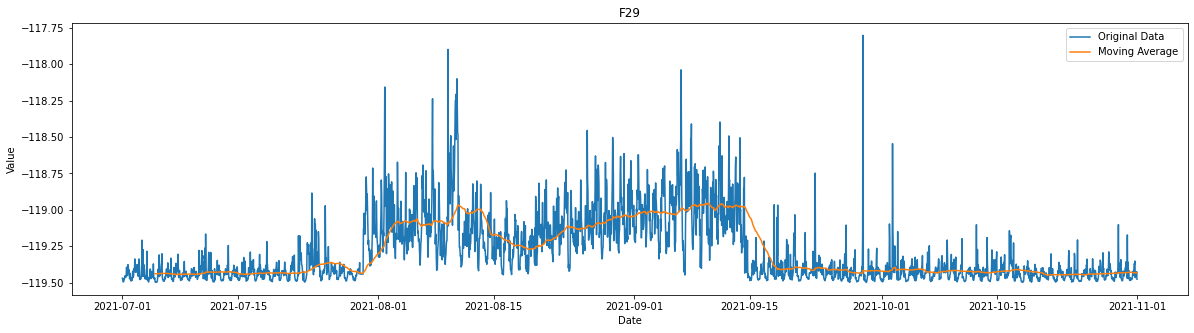

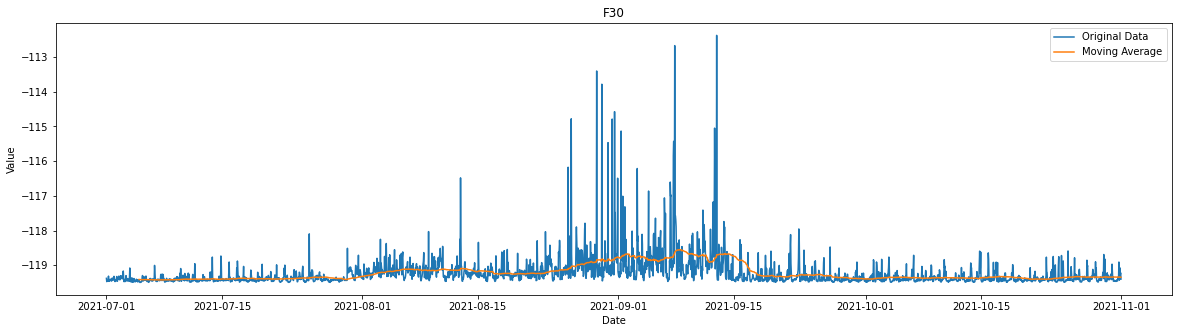

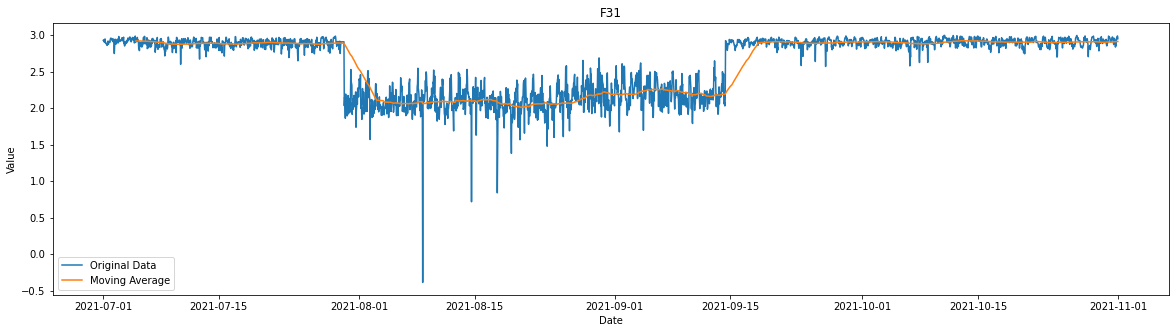

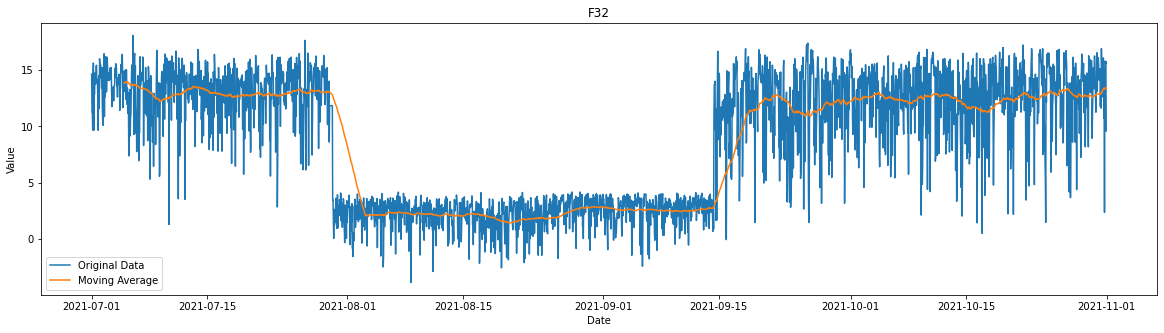

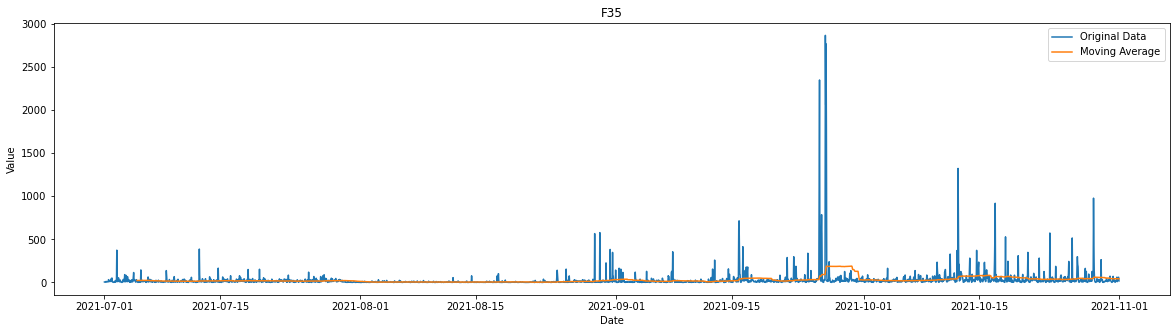

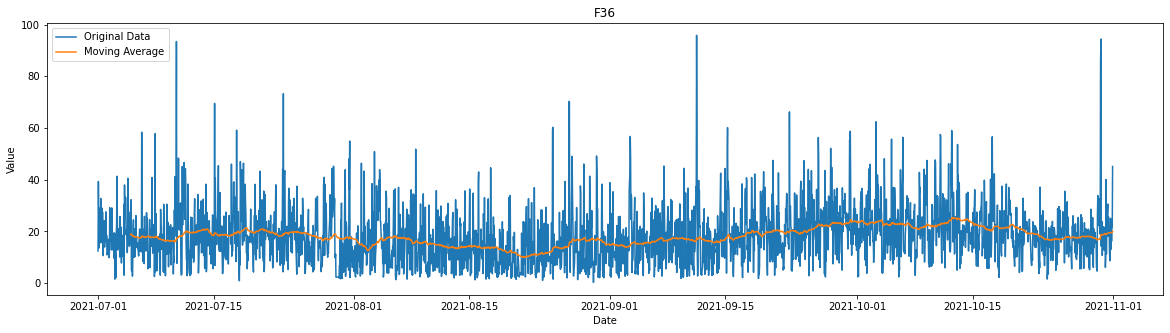

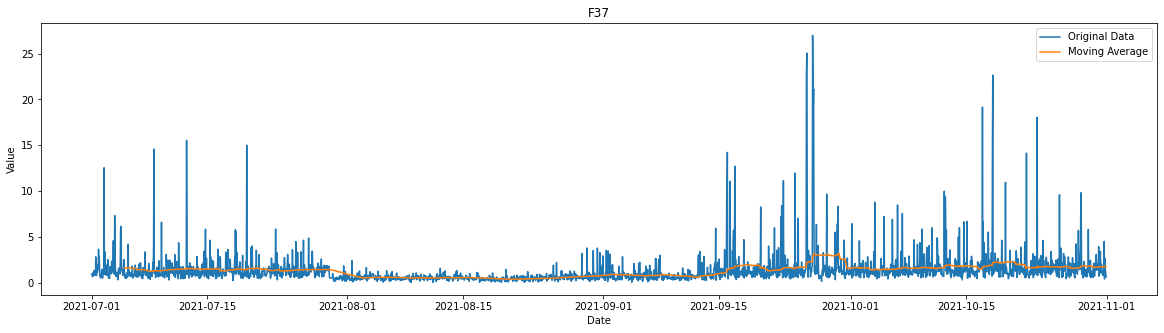

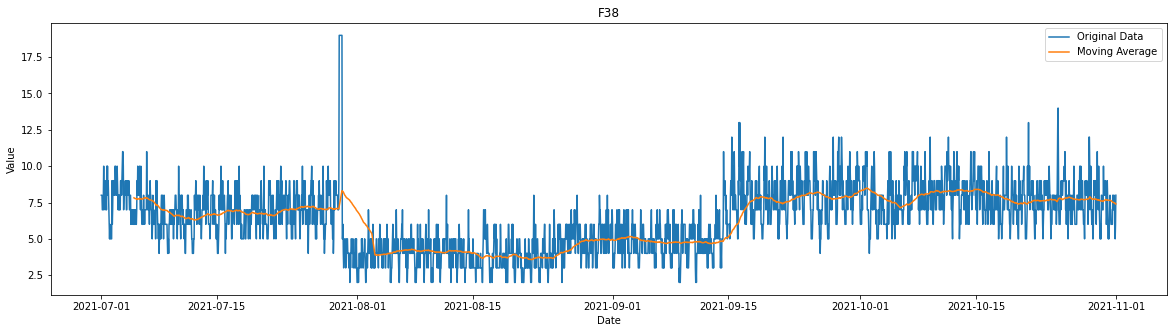

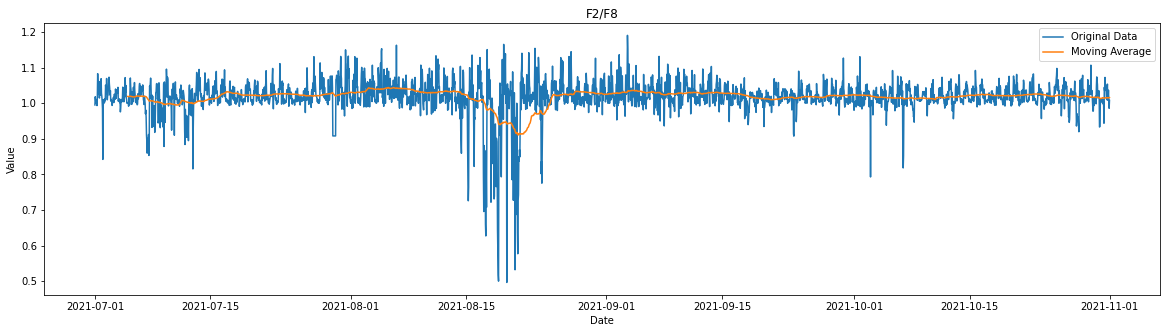

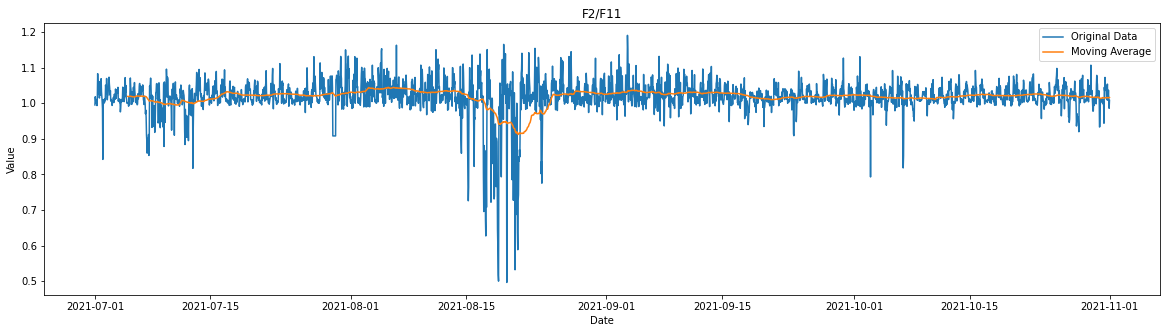

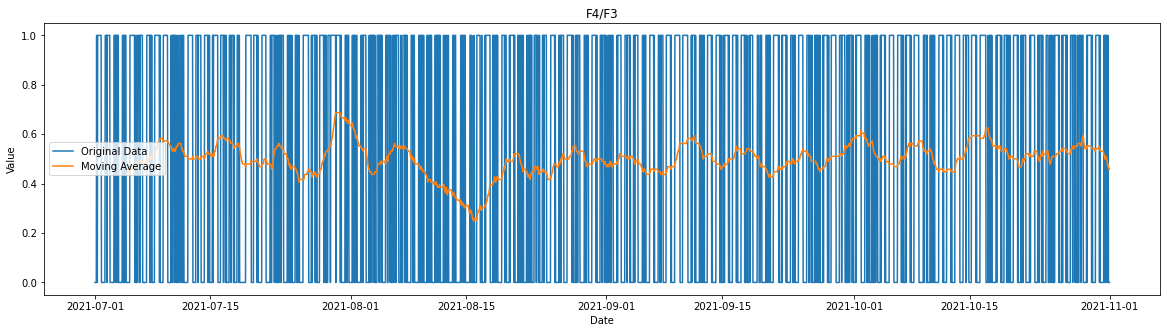

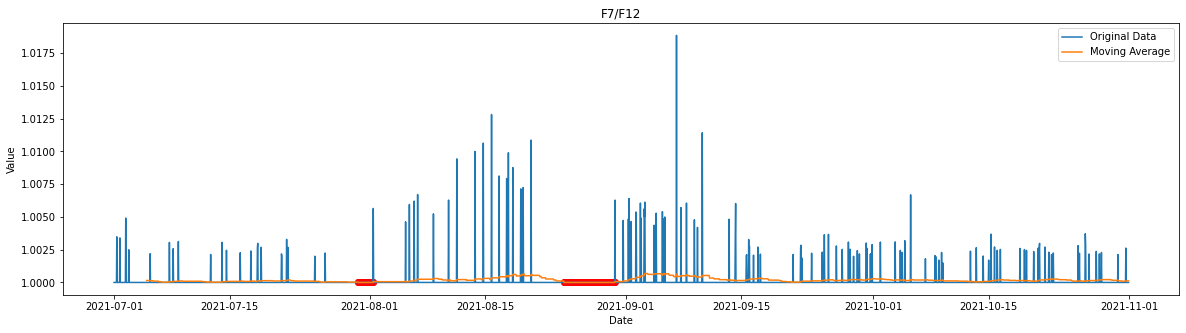

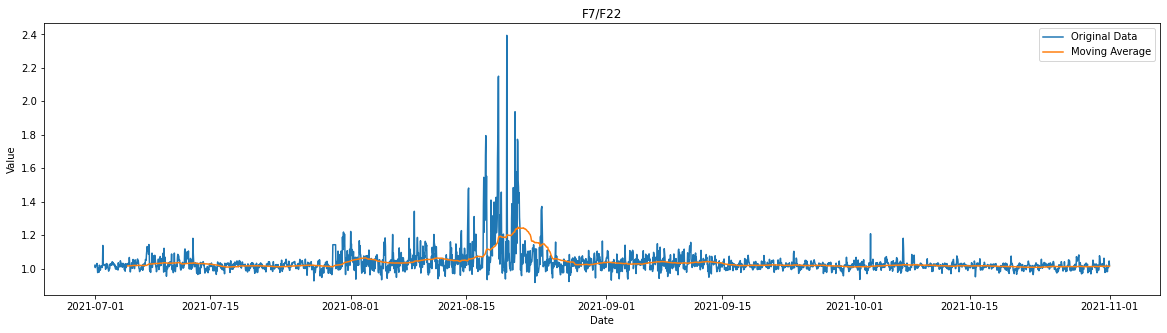

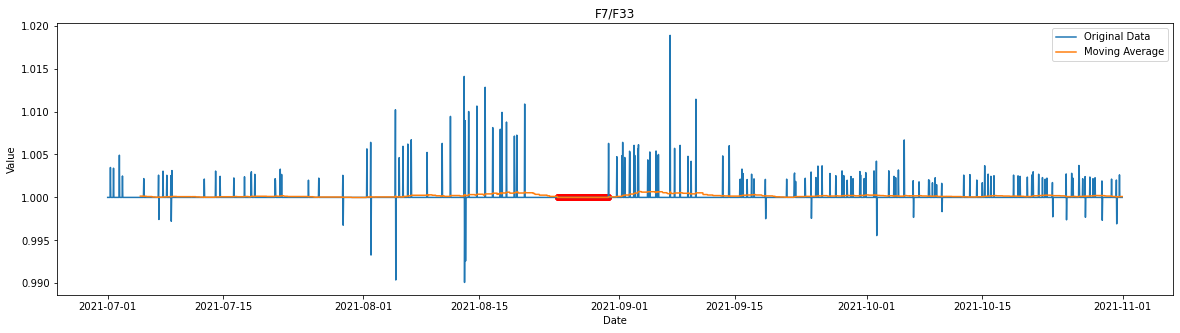

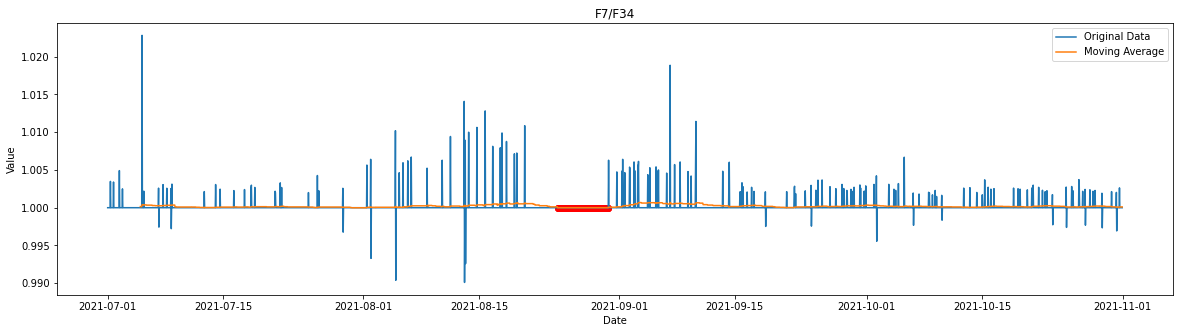

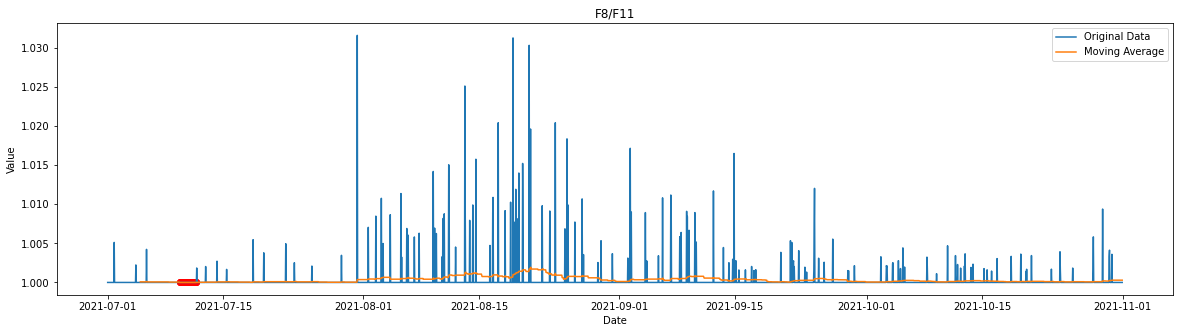

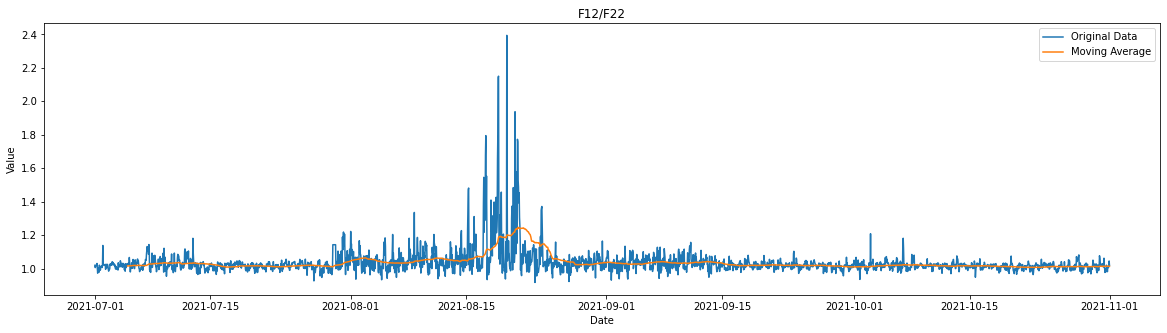

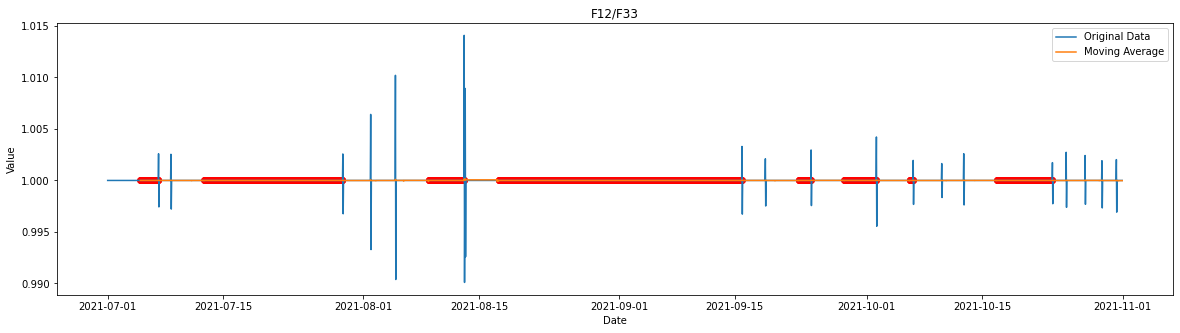

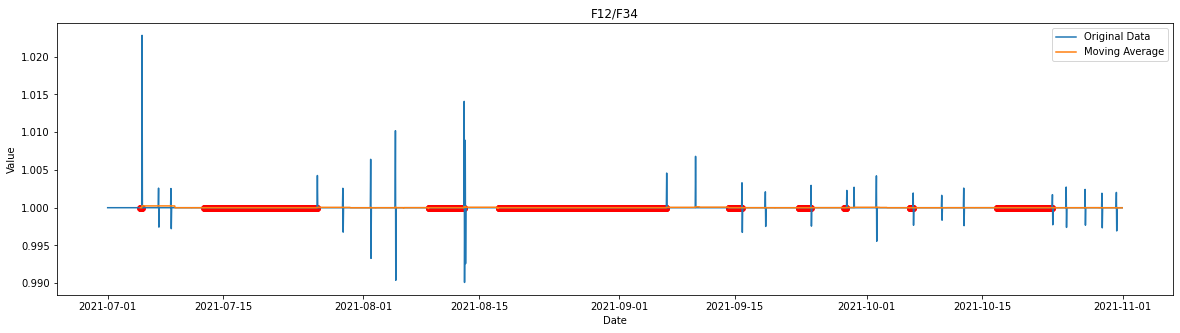

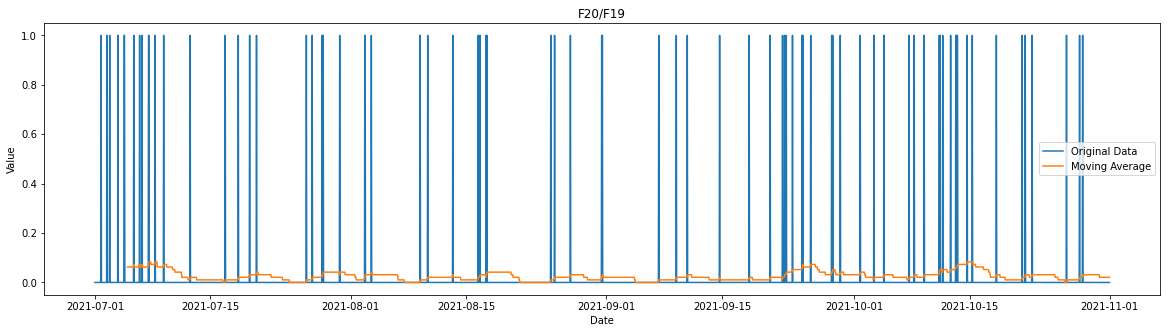

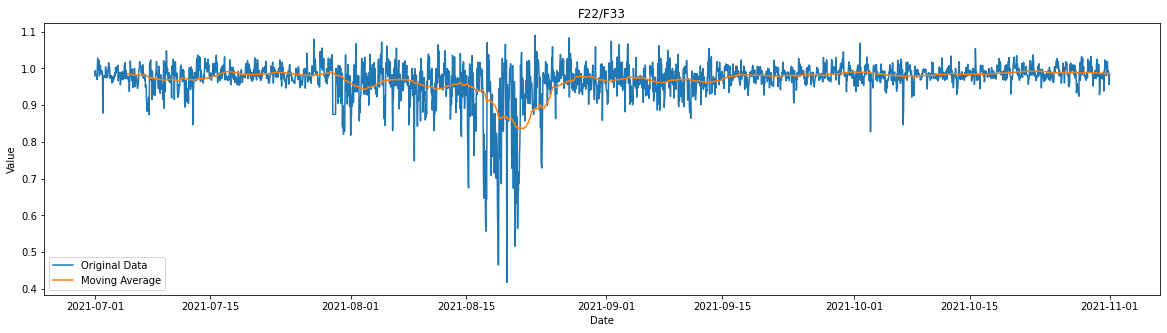

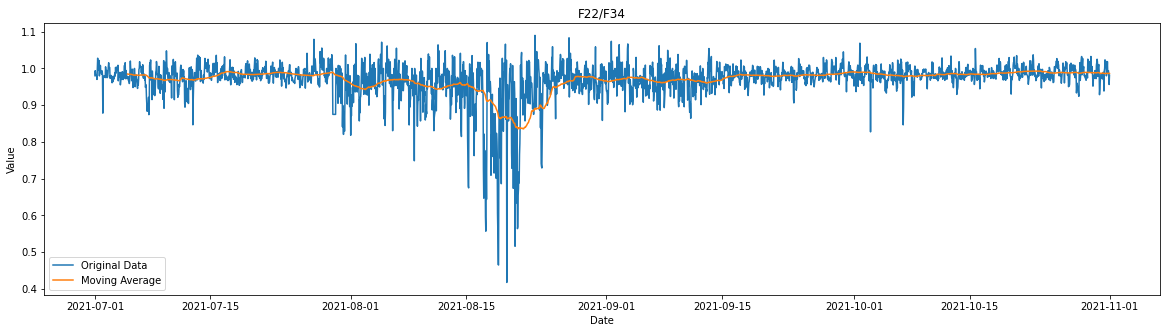

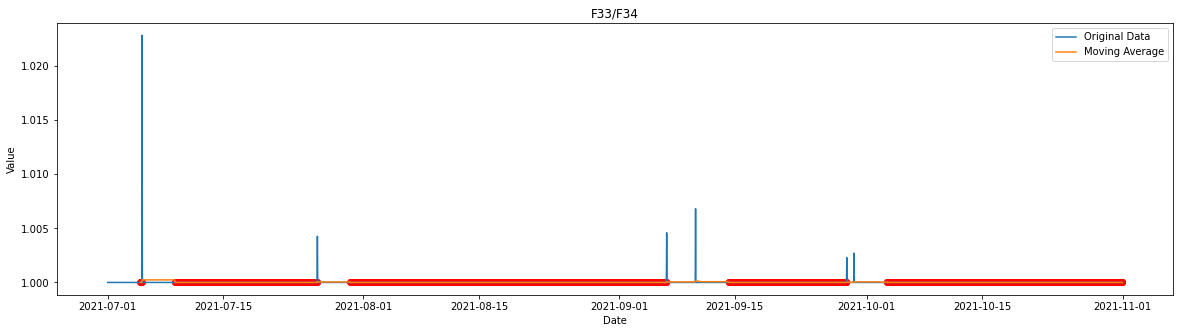

138.41463414634146
4.688842620133518


In [15]:

plt.rcParams['figure.figsize'] = [20,5]
lamda=10
window_size=96
no_col = len(df.columns)
no_rows = df.shape[0]
col_anomalies=0


for col in df.columns:
    rolling_mean = df[col].rolling(window=window_size).mean()
    std = df[col].rolling(window=window_size).std()
    threshold = lamda * std
    plt.plot(df.index, df[col], label='Original Data')
    plt.plot(rolling_mean.index, rolling_mean, label='Moving Average')
    plt.legend(loc='best')
    upper_limit = rolling_mean + threshold
    lower_limit = rolling_mean - threshold
    anomalies = (df[col] > upper_limit) | (df[col] < lower_limit)
    num_anomalies = anomalies.sum()
    col_anomalies=col_anomalies+num_anomalies
            
    plt.scatter(df.index[anomalies], df[col][anomalies], color='red', label='Anomalies')
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()
    
avg_anomalies=col_anomalies/no_col
per_ano = (avg_anomalies*100)/no_rows

print(avg_anomalies)
print(per_ano)